In [78]:
import os
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-78-cc3736c349dc>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [79]:
def parser(x):
    return datetime.strptime(x,'%d/%m/%Y')

train=pd.read_csv("C:/Users/User/Documents/SEM 4/Makerthon/Malaysia Daily Cases.csv", parse_dates= ['Date'], date_parser=parser) 
train_original= train.copy()
train.head()

test=pd.read_csv("C:/Users/User/Documents/SEM 4/Makerthon/Malaysia Daily Cases.csv", parse_dates= ['Date'], date_parser=parser )
test_original= test.copy()

In [80]:
for df in (train,test,test_original,train_original):
    df['year']= df.Date.dt.year
    df['month']= df.Date.dt.month
    df['day']= df.Date.dt.day

In [81]:
train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)

Text(0, 0.5, 'Number of Cases')

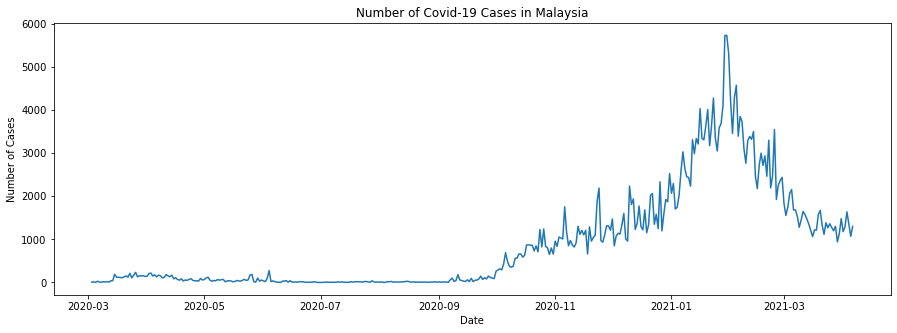

In [82]:
plt.figure(figsize= (15,5))
plt.plot(train.DailyCases)

plt.title("Number of Covid-19 Cases in Malaysia")
plt.xlabel("Date")
plt.ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

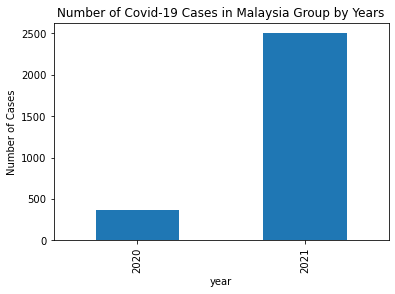

In [83]:
train.groupby('year')['DailyCases'].mean().plot(kind='bar')
plt.title("Number of Covid-19 Cases in Malaysia Group by Years")
plt.ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

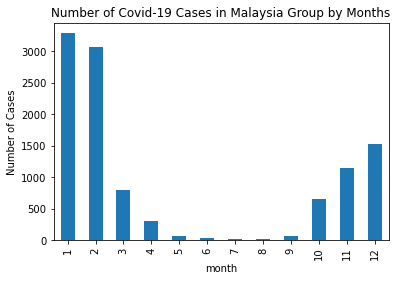

In [84]:
train.groupby('month')['DailyCases'].mean().plot(kind='bar')
plt.title("Number of Covid-19 Cases in Malaysia Group by Months")
plt.ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

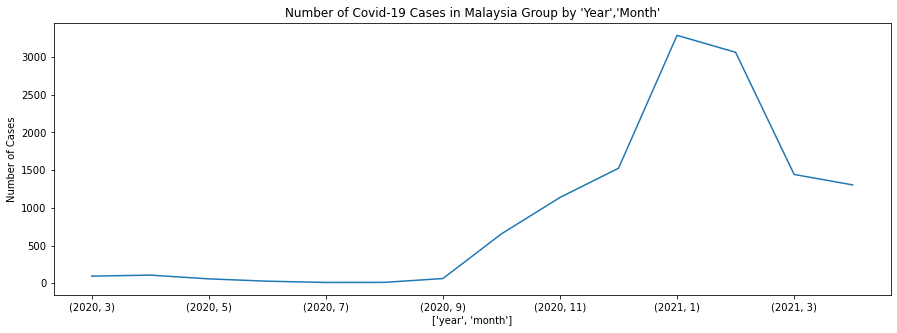

In [85]:
plt.figure(figsize=(15,5))
train.groupby(['year','month'])['DailyCases'].mean().plot()
plt.xlabel(['year','month'])
plt.title("Number of Covid-19 Cases in Malaysia Group by 'Year','Month'")
plt.ylabel("Number of Cases")

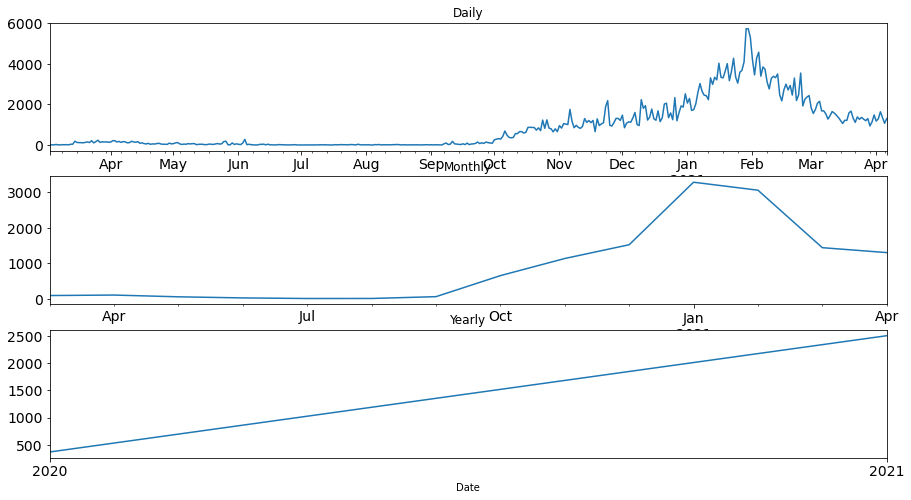

In [86]:
yearly = train.resample('Y').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()
fig, axs = plt.subplots(3,1) 

daily.DailyCases.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[0])
monthly.DailyCases.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[1]) 
yearly.DailyCases.plot(figsize=(15,8), title= 'Yearly', fontsize=14, ax=axs[2])

plt.show()

In [87]:
train = train.resample('D').mean()

training= train.loc['2020-12-01':'2021-02-28']
validation= train.loc['2021-02-28':'2021-03-31']

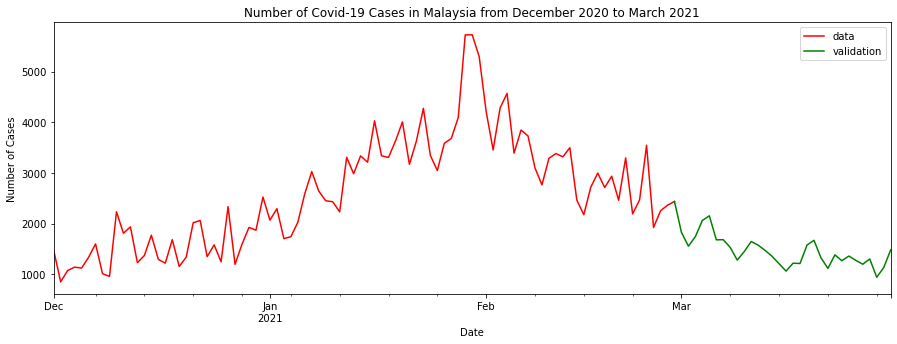

In [88]:
plt.figure(figsize=(15,5))
training.DailyCases.plot(color='red', label= 'data')
validation.DailyCases.plot(color='green', label= 'validation')
plt.legend()
plt.title("Number of Covid-19 Cases in Malaysia from December 2020 to March 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

In [89]:
y_hat = validation.copy() 
y_hat['naive'] = training.DailyCases[len(training.DailyCases)-1]

In [90]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(validation.DailyCases,y_hat.naive))
rmse

1014.6991395236324

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


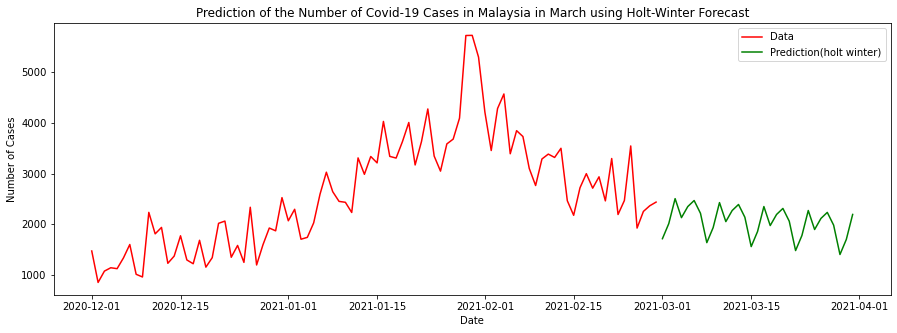

In [91]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg= validation.copy()
fit= ExponentialSmoothing(training.DailyCases, seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['holt_winter']= fit.forecast(len(validation.DailyCases))
plt.figure(figsize=(15,5))
plt.plot(training['DailyCases'],label='Data',color='red')
plt.plot(y_hat_avg['holt_winter'], label='Prediction(holt winter)',color='green') 

plt.legend(loc='best')
plt.title("Prediction of the Number of Covid-19 Cases in Malaysia in March using Holt-Winter Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()